In [1]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score

pd.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("houseprice.csv")
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
[col for col in data.columns if "Sold" in col]

['MoSold', 'YrSold']

<Axes: xlabel='MoSold'>

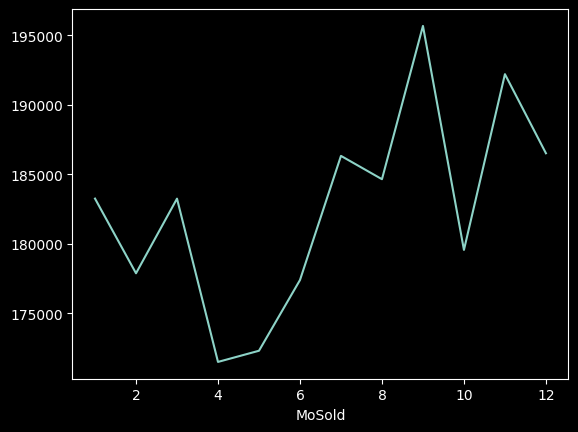

In [4]:
data.groupby("MoSold")["SalePrice"].mean().plot()

<Axes: xlabel='YrSold'>

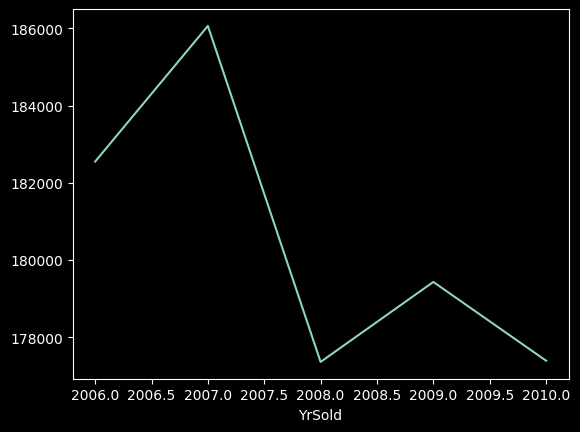

In [5]:
data.groupby("YrSold")["SalePrice"].mean().plot()

In [6]:
X = data.drop(["Id","SalePrice"],axis=1)
y = data["SalePrice"]

cat_cols = list(X.select_dtypes(exclude="number"))
num_cols = list(X.select_dtypes(include="number"))
num_but_cat = [col for col in num_cols if X[col].nunique()<20]
year_cols = [col for col in X.columns if "Yr" in col or "Year" in col]

cat_cols = [col for col in cat_cols if col not in year_cols]
num_cols = [col for col in num_cols if col not in num_but_cat and col not in year_cols]

In [7]:
data[year_cols]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


In [8]:
for var in num_but_cat:
    if var not in year_cols:
        print(var, data[var].unique())

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
BsmtFullBath [1 0 2 3]
BsmtHalfBath [0 1 2]
FullBath [2 1 3 0]
HalfBath [1 0 2]
BedroomAbvGr [3 4 1 2 0 5 6 8]
KitchenAbvGr [1 2 3 0]
TotRmsAbvGrd [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces [0 1 2 3]
GarageCars [2 3 1 0 4]
PoolArea [  0 512 648 576 555 480 519 738]
MoSold [ 2  5  9 12 10  8 11  4  1  7  3  6]


In [9]:
data[num_cols]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,2500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0


In [10]:
for col in data.columns:
    if data[col].isnull().sum()>0:
        print(col, data[col].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.5972602739726027
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


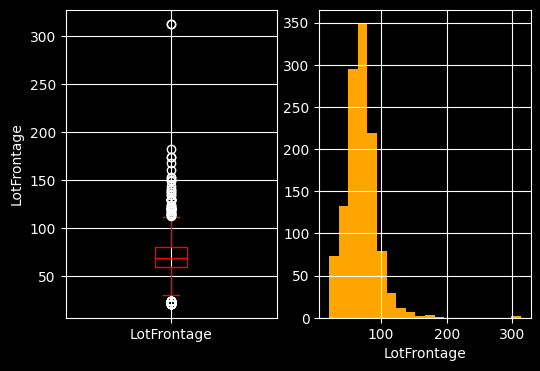

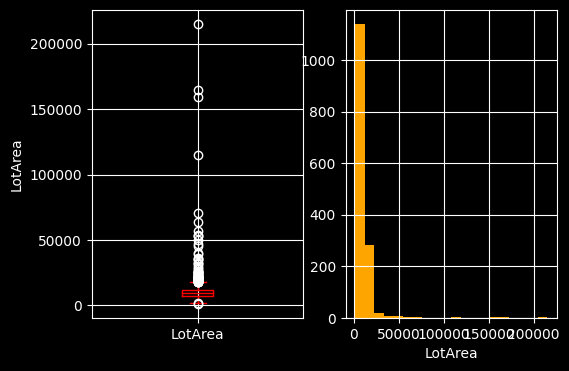

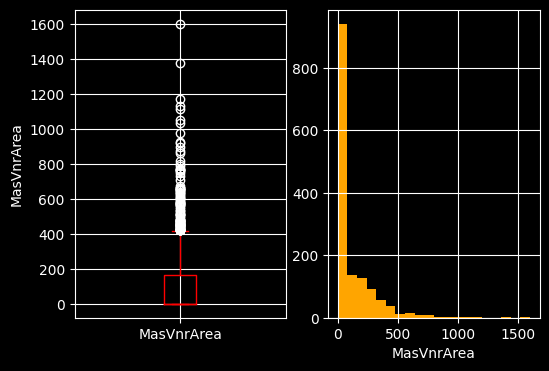

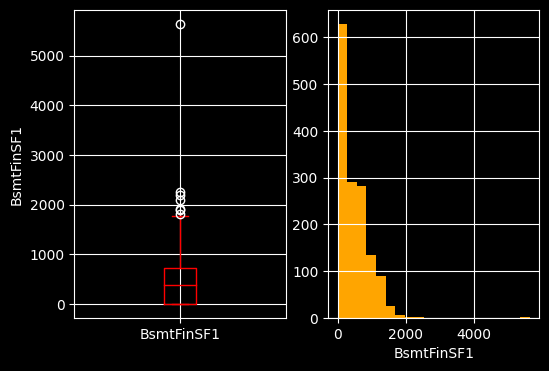

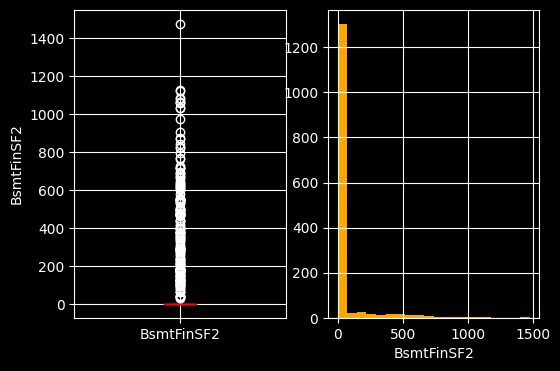

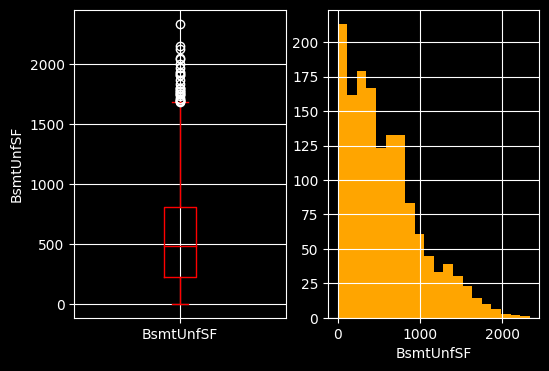

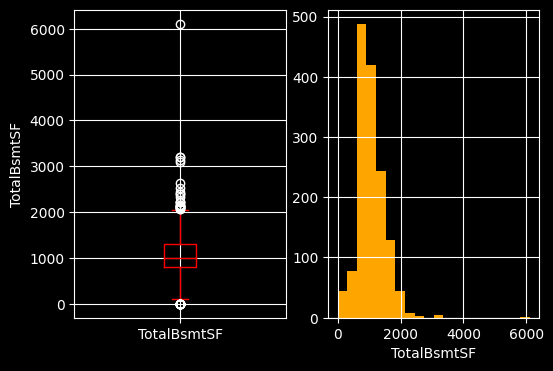

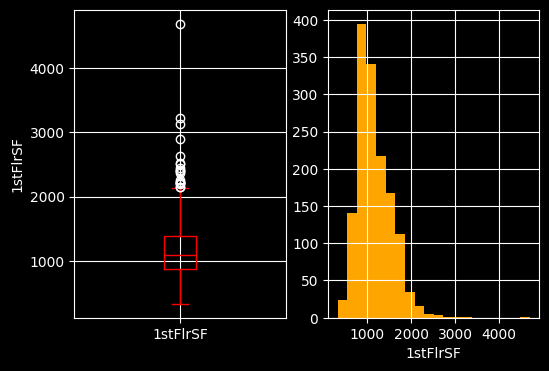

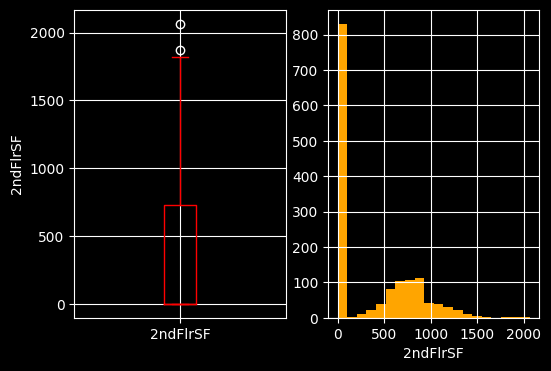

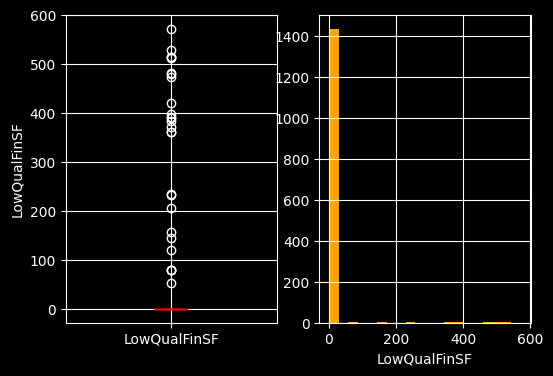

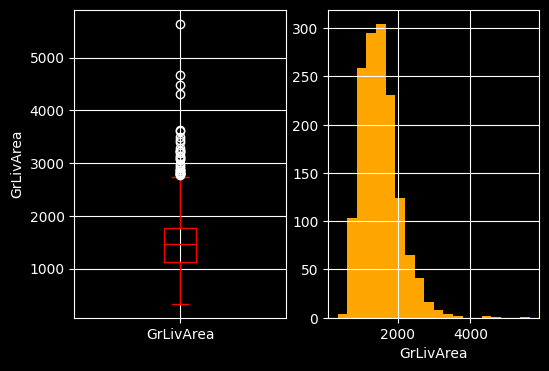

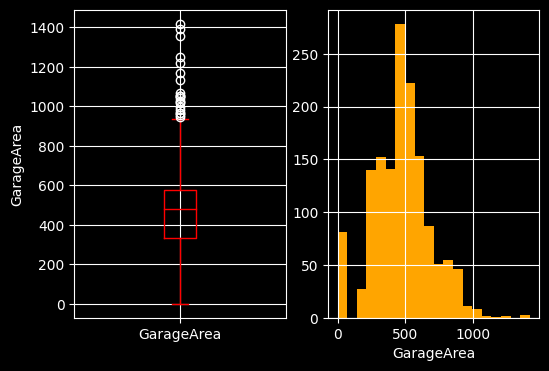

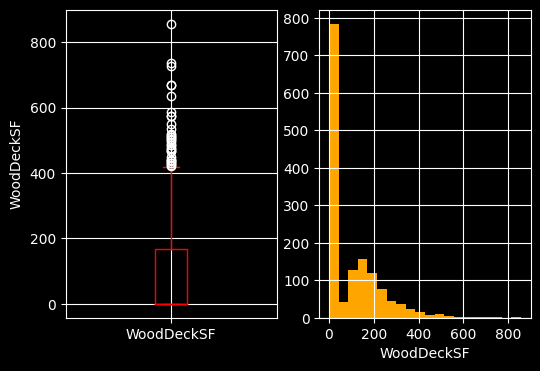

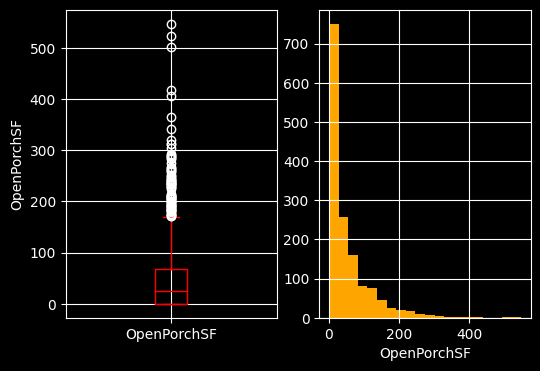

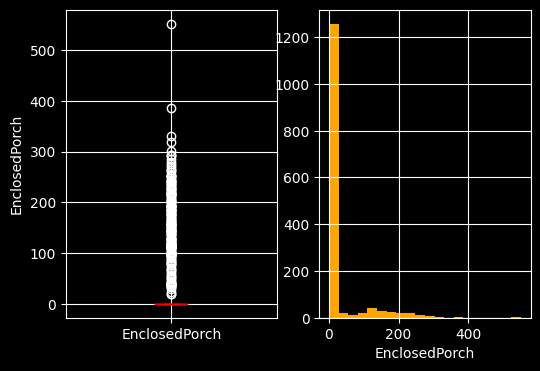

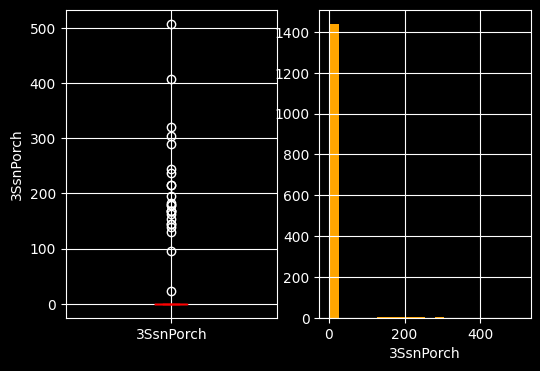

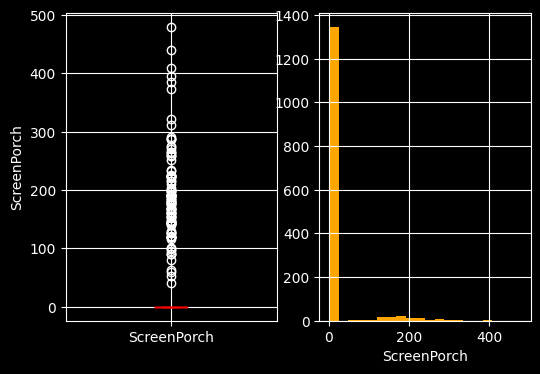

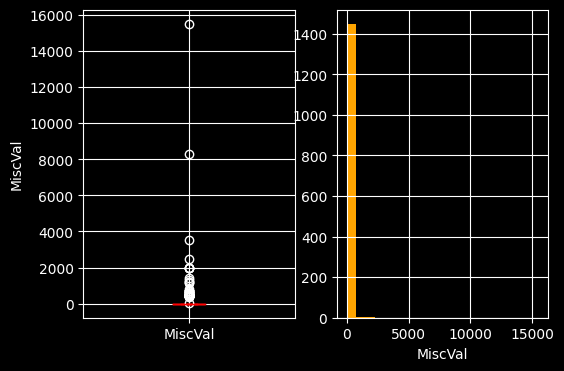

In [11]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.subplot(1,2,1)
    fig = data.boxplot(column=col,color="red")
    fig.set_ylabel(col)
    
    
    plt.subplot(1,2,2)
    fig = data[col].hist(bins=20,color="orange")
    fig.set_xlabel(col)
    

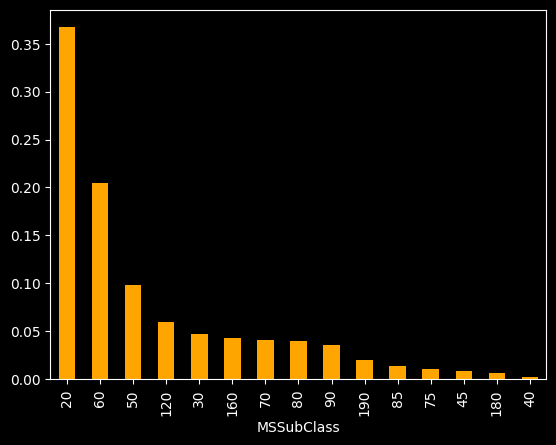

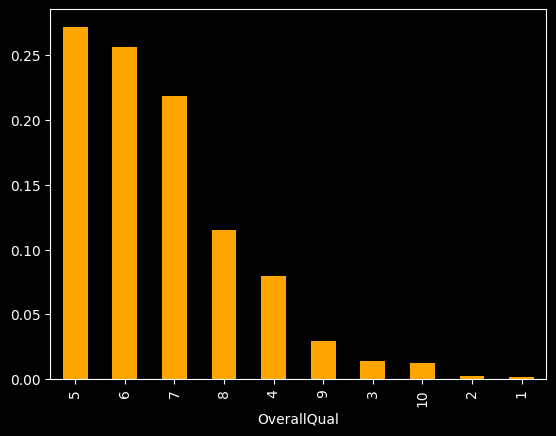

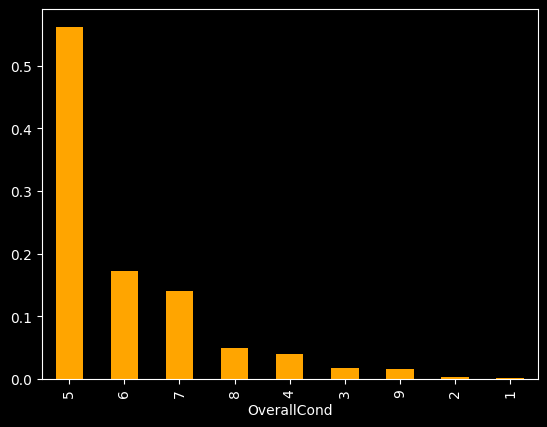

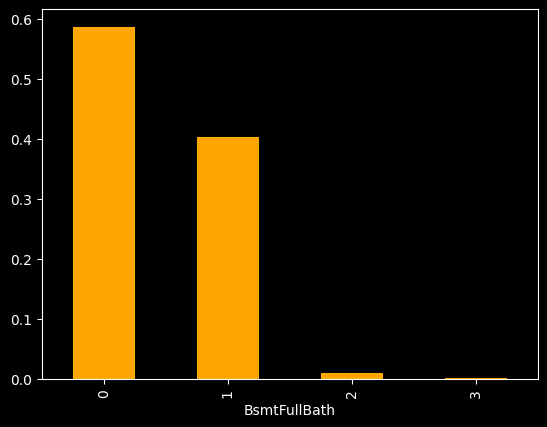

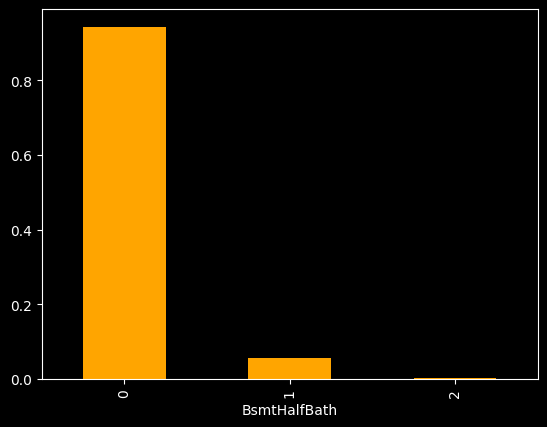

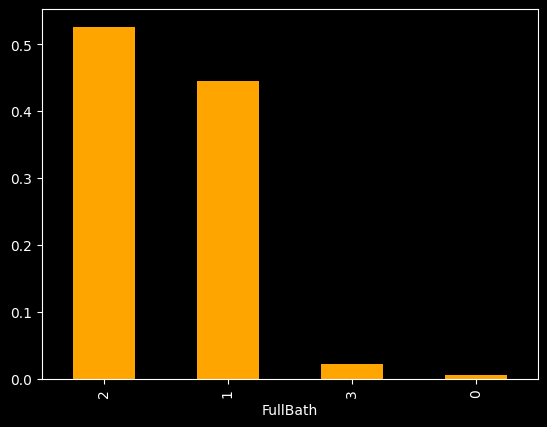

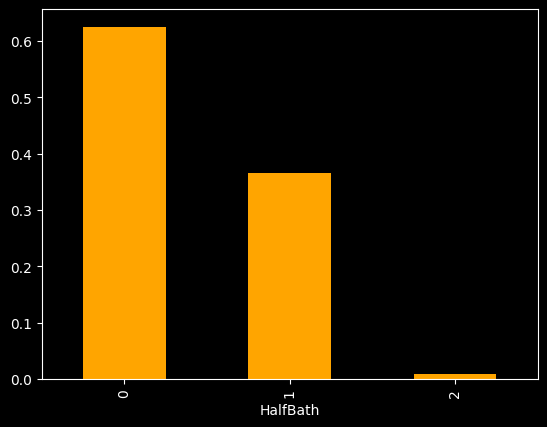

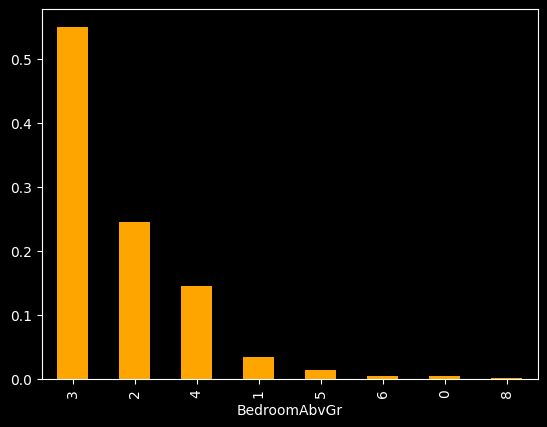

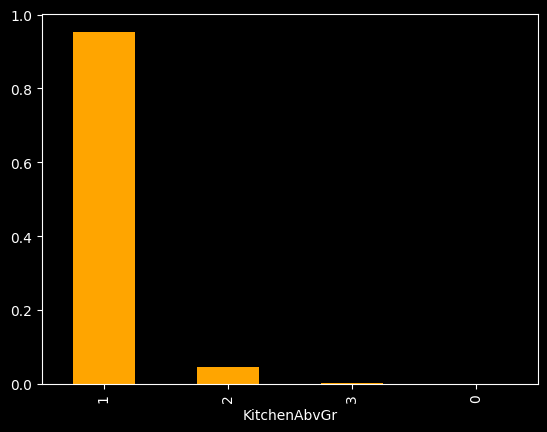

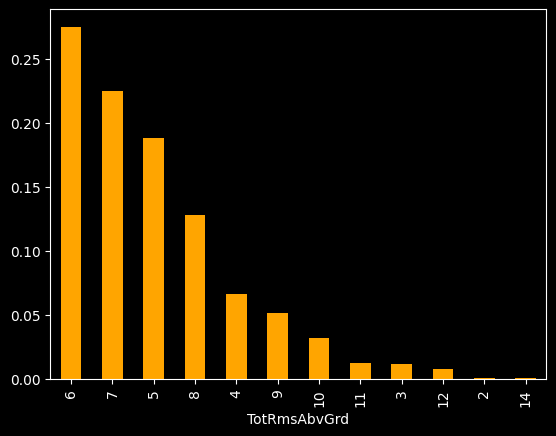

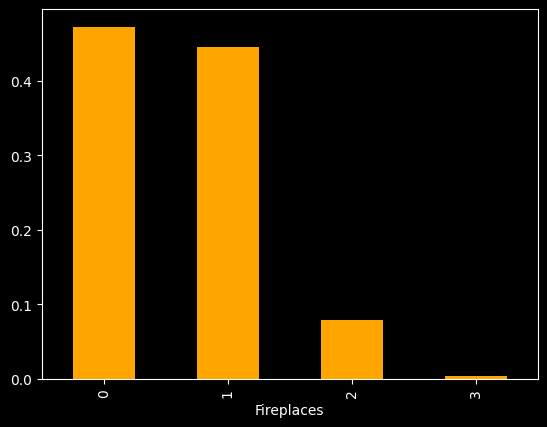

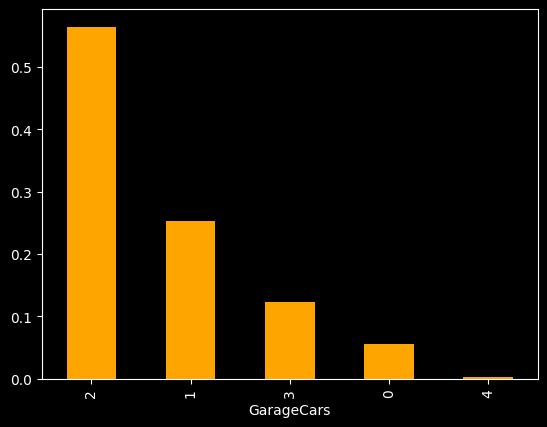

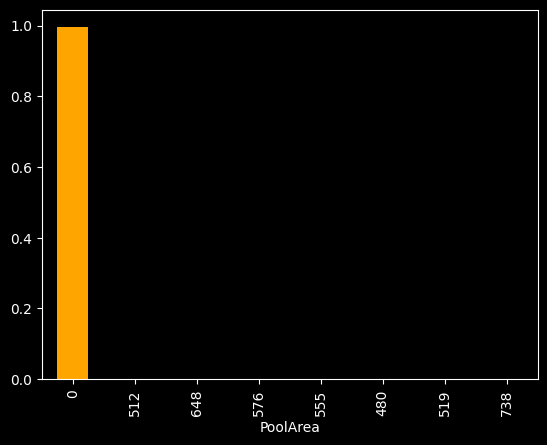

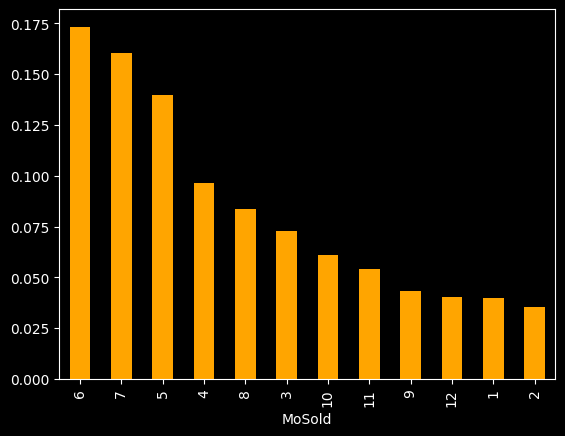

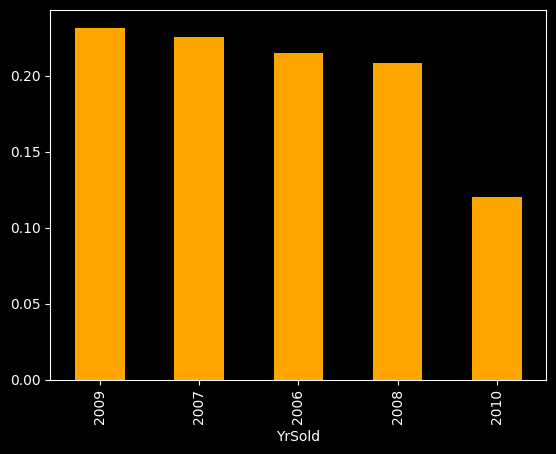

In [12]:
for col in num_but_cat:
    data[col].value_counts(normalize=True).plot.bar(color="orange")
    plt.show()

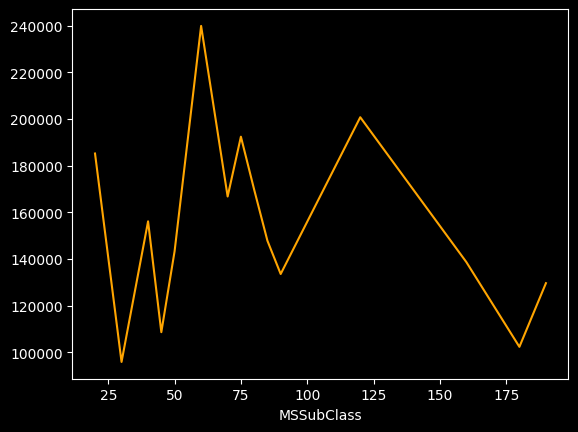

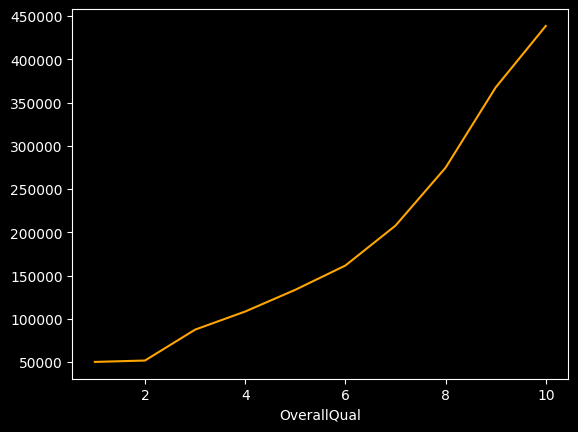

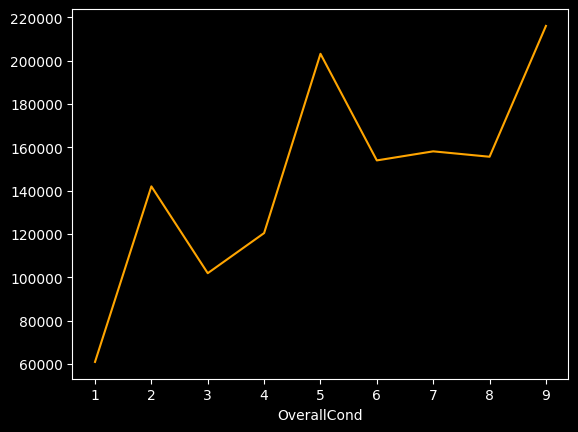

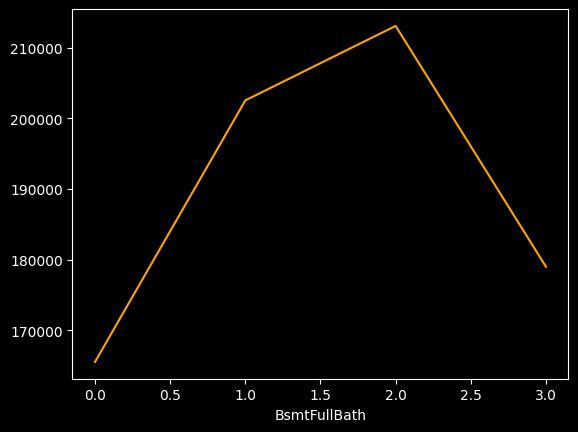

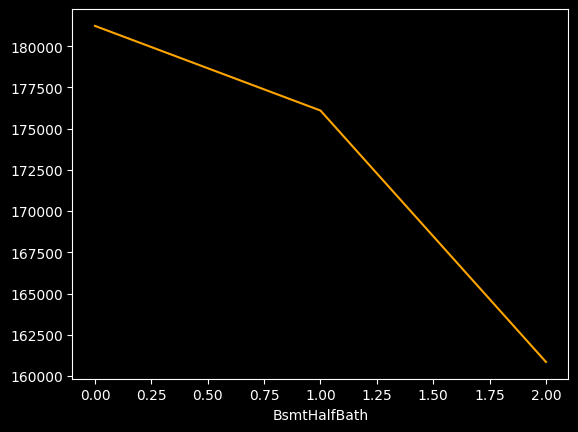

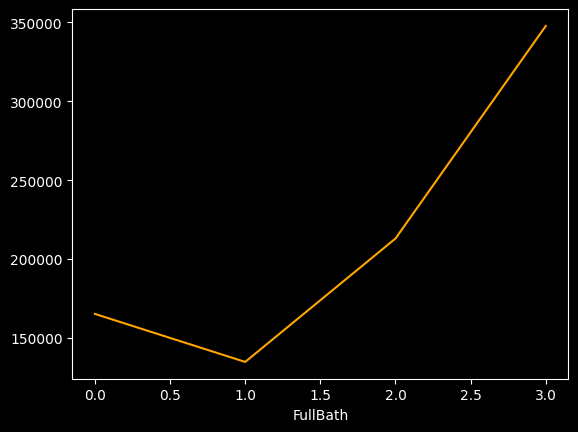

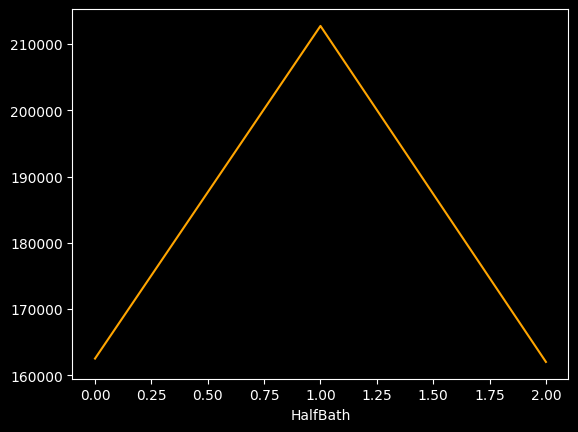

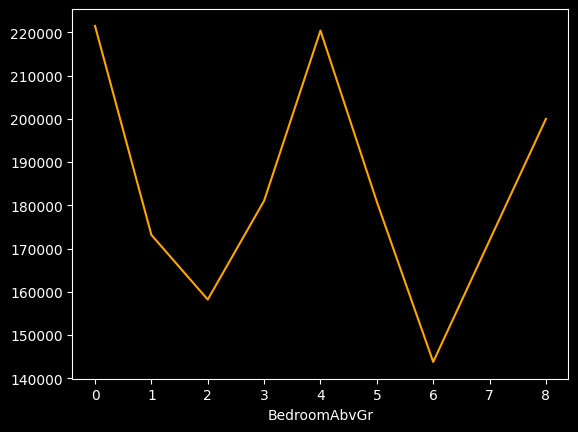

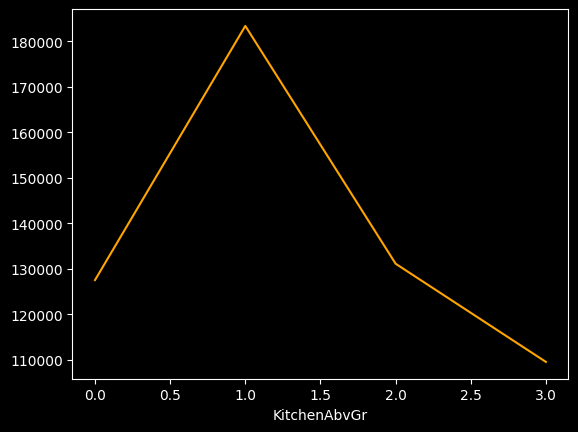

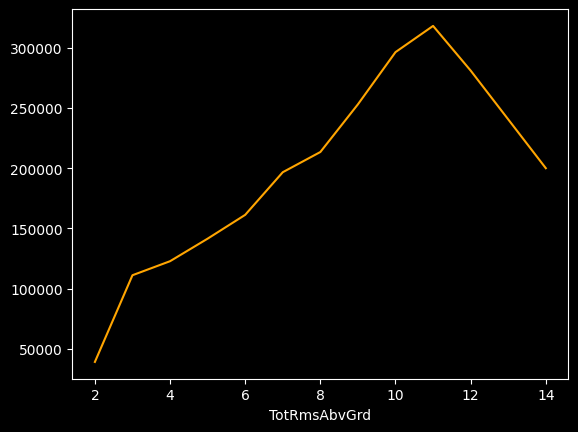

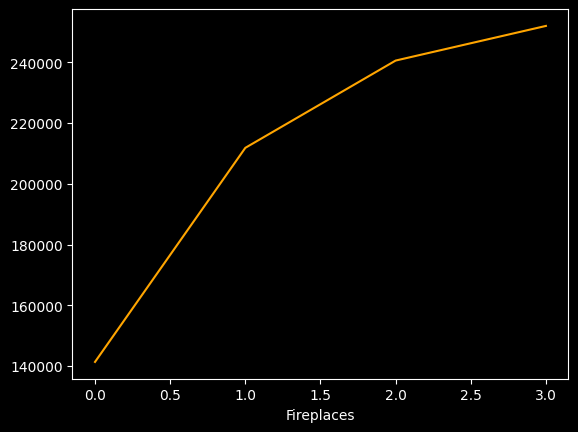

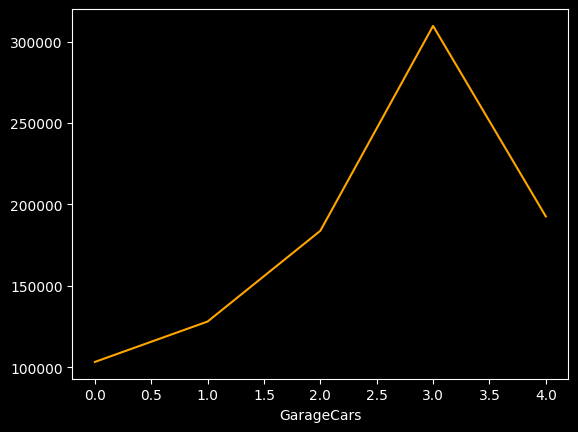

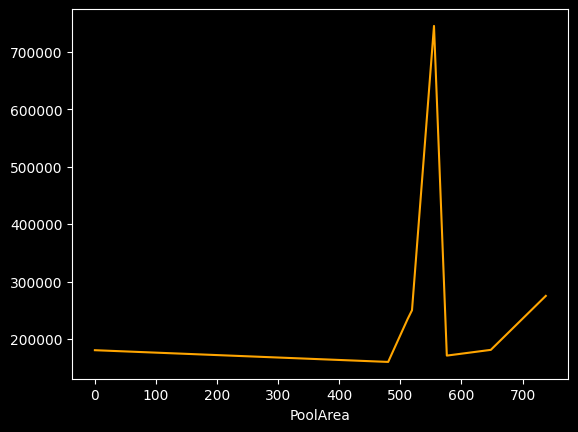

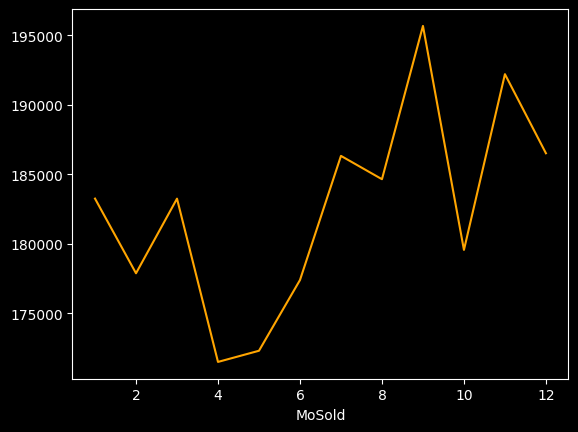

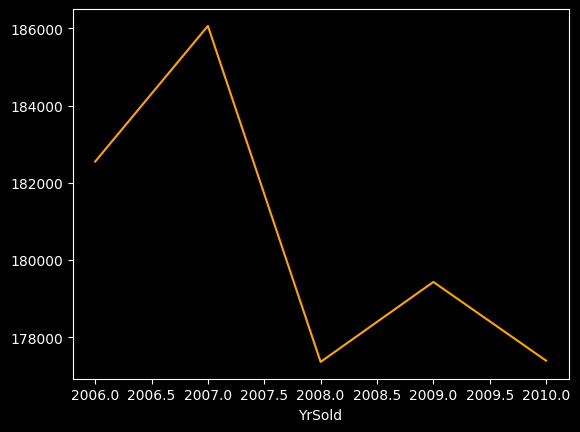

In [13]:
for col in num_but_cat:
    data.groupby(col)["SalePrice"].mean().plot(color = "orange")
    plt.show()

In [14]:
for col in num_but_cat:
    print(data[col].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64
OverallQual
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: proportion, dtype: float64
OverallCond
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: proportion, dtype: float64
BsmtFullBath
0    0.586301
1    0.402740
2    0.010274
3    0.000685
Name: proportion, dtype: float64
BsmtHalfBath
0    0.943836
1    0.054795
2    0.001370
Name: proportion, dtype: float64
FullBath
2    0.526027
1    0.445205
3    0.022603
0    0.006164
Name: proportion, dtype: float64
HalfBath
0    0.625342
1    0.366438
2    0.008219
Name: propo

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.1,random_state =10)

In [16]:
def elapsed_years(df,var):
    df[var] = df["YrSold"] - df[var]
    return df

for var in ["YearBuilt","YearRemodAdd","GarageYrBlt"]:
    X_train = elapsed_years(X_train,var)
    X_test = elapsed_years(X_test,var)

In [17]:
X_train["YrSold"]

752     2006
1341    2008
524     2007
1396    2010
1087    2009
        ... 
1393    2008
1344    2007
527     2008
1149    2009
1289    2006
Name: YrSold, Length: 1314, dtype: int64

In [18]:
X_train[["YearBuilt","YearRemodAdd","GarageYrBlt"]]

,YearBuilt,YearRemodAdd,GarageYrBlt
752,9,9,9.0
1341,5,4,4.0
524,11,10,11.0
1396,62,60,44.0
1087,4,3,4.0
...,...,...,...
1393,103,8,5.0
1344,1,1,1.0
527,0,0,0.0
1149,89,21,79.0


In [19]:
X_train.drop("YrSold",axis=1,inplace=True)
X_test.drop("YrSold",axis=1,inplace=True)

In [20]:
year_cols.remove("YrSold")

In [21]:
for col in num_cols + year_cols:
    if X_train[col].isnull().mean()>0:
        print(col,X_train[col].isnull().mean())

LotFrontage 0.17275494672754946
MasVnrArea 0.0045662100456621
GarageYrBlt 0.05707762557077625


In [22]:
num_but_cat.remove("YrSold")

In [23]:
X_train[num_but_cat] = X_train[num_but_cat].astype("O")
X_test[num_but_cat] = X_test[num_but_cat].astype("O")

In [24]:
for col in num_but_cat:
    if X_train[col].isnull().mean()>0:
        print(col,X_train[col].isnull().mean())

In [25]:
from feature_engine.imputation import MeanMedianImputer,CategoricalImputer
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder

In [26]:
num_but_cat

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

In [27]:
X_train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 752 to 1289
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1314 non-null   object
 1   Street         1314 non-null   object
 2   Alley          80 non-null     object
 3   LotShape       1314 non-null   object
 4   LandContour    1314 non-null   object
 5   Utilities      1314 non-null   object
 6   LotConfig      1314 non-null   object
 7   LandSlope      1314 non-null   object
 8   Neighborhood   1314 non-null   object
 9   Condition1     1314 non-null   object
 10  Condition2     1314 non-null   object
 11  BldgType       1314 non-null   object
 12  HouseStyle     1314 non-null   object
 13  RoofStyle      1314 non-null   object
 14  RoofMatl       1314 non-null   object
 15  Exterior1st    1314 non-null   object
 16  Exterior2nd    1314 non-null   object
 17  MasVnrType     536 non-null    object
 18  ExterQual      1314 non-null   

In [67]:
house_pipe = Pipeline(steps=[
    
    ("imputer_num",MeanMedianImputer(variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    ("imputer_cat",CategoricalImputer(variables=cat_cols)),
    
    ("rare_enc",RareLabelEncoder(tol=0.05,n_categories=1,variables=cat_cols+num_but_cat)),
    ("categorical_enc",OrdinalEncoder(encoding_method="ordered",variables=cat_cols+num_but_cat)),
    ("scaler",StandardScaler()),
    ("lasso",Lasso(random_state=10,max_iter=2000))
])

In [68]:
house_pipe.fit(X_train,y_train)

Pipeline(steps=[('imputer_num',
                 MeanMedianImputer(variables=['LotFrontage', 'MasVnrArea',
                                              'GarageYrBlt'])),
                ('imputer_cat',
                 CategoricalImputer(variables=['MSZoning', 'Street', 'Alley',
                                               'LotShape', 'LandContour',
                                               'Utilities', 'LotConfig',
                                               'LandSlope', 'Neighborhood',
                                               'Condition1', 'Condition2',
                                               'BldgType', 'HouseStyle',
                                               'RoofStyle', 'RoofMatl',
                                               'Exterior1st', 'Exterior2...
                                           'LandSlope', 'Neighborhood',
                                           'Condition1', 'Condition2',
                                           'BldgType', 'HouseStyle',
                                           'RoofStyle', 'RoofMatl',
                                           'Exterior1st', 'Exterior2nd',
                                           'MasVnrType', 'ExterQual',
                                           'ExterCond', 'Foundation',
                                           'BsmtQual', 'BsmtCond',
                                           'BsmtExposure', 'BsmtFinType1',
                                           'BsmtFinType2', 'Heating',
                                           'HeatingQC', 'CentralAir',
                                           'Electrical', ...])),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(max_iter=2000, random_state=10))])

In [69]:
cross_val_score(house_pipe,X_train,y_train,cv=10,scoring="r2",n_jobs=-1)

array([0.85047825, 0.8628832 , 0.87805038, 0.82293977, 0.85028307,
       0.28274594, 0.86035825, 0.68119048,        nan,        nan])

In [70]:
house_pipe.fit(X_train, y_train)

X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)

In [71]:
print(f'train mse: {mean_squared_error(y_train, X_train_preds)}')
print(f'train rmse: {mean_squared_error(y_train, X_train_preds, squared=False)}')
print(f'train r2: {r2_score(y_train, X_train_preds)}')
print()
print(f'test mse: {mean_squared_error(y_test, X_test_preds)}')
print(f'test rmse: {mean_squared_error(y_test, X_test_preds, squared=False)}')
print(f'test r2: {r2_score(y_test, X_test_preds)}')

train mse: 1005432986.8837298
train rmse: 31708.56330526077
train r2: 0.8430555543938938

test mse: 829038091.2813171
test rmse: 28793.021572619244
test r2: 0.8467261532842277


<Axes: >

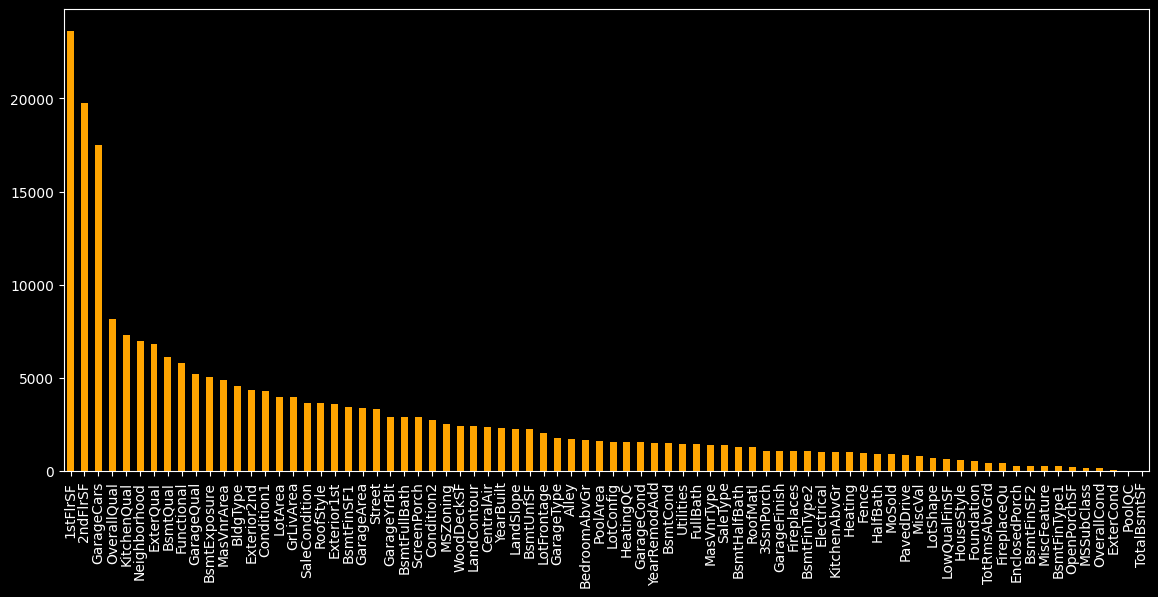

In [74]:
importance = pd.Series(np.abs(house_pipe.named_steps["lasso"].coef_),index=X_train.columns)
importance.sort_values(ascending=False,inplace=True)
importance.plot.bar(color="orange",figsize=(14,6))
